In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
url = 'https://www.worldometers.info/world-population/population-by-country/#google_vignette'

In [8]:
response = requests.get(url)
response = response.content
soup = BeautifulSoup(response, 'html.parser')

In [11]:
rows = soup.find('table', {'id': 'example2'}).find('tbody').find_all('tr')

In [19]:
countries_list = []

for row in rows:
    dic = {}

    dic['Country'] = row.find_all('td')[1].text
    dic['Population 2024'] = int(row.find_all('td')[2].text.replace(',', ''))
    dic['World Share'] = row.find_all('td')[11].text


    countries_list.append(dic)

In [22]:
df = pd.DataFrame(countries_list)

In [27]:
df.to_csv('Country_Population.csv', index=False)

In [24]:
df.head()

,Country,Population 2024,World Share
0,India,1428627663,17.76 %
1,China,1425671352,17.72 %
2,United States,339996563,4.23 %
3,Indonesia,277534122,3.45 %
4,Pakistan,240485658,2.99 %


<h2> Exploratory Data Analysis

How many countries are in the dataset

In [25]:
df['Country'].nunique()

234

Top 5 Countries by Population

In [26]:
top_populated_countries = pd.DataFrame(df.groupby('Country')['Population 2024'].sum().sort_values(ascending = False).reset_index()).head(5)
top_populated_countries

,Country,Population 2024
0,India,1428627663
1,China,1425671352
2,United States,339996563
3,Indonesia,277534122
4,Pakistan,240485658


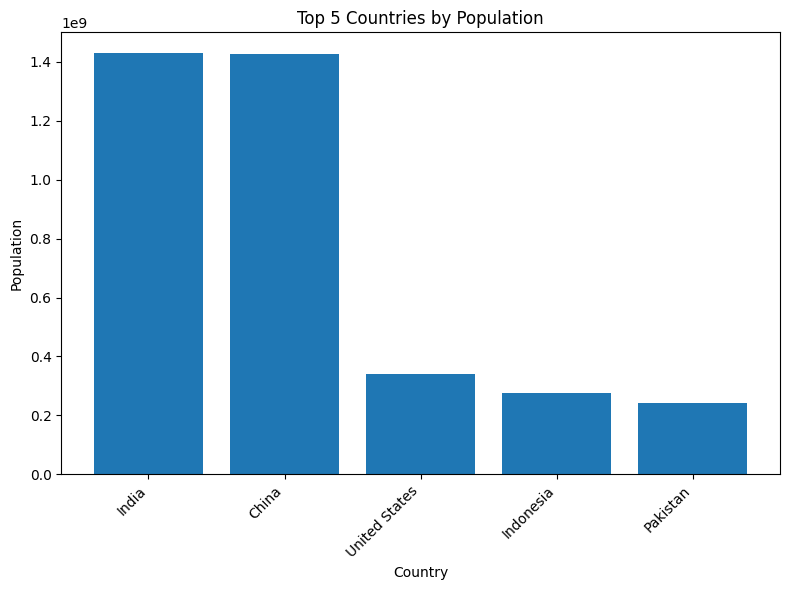

In [30]:
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.bar(top_populated_countries['Country'], top_populated_countries['Population 2024'])
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 5 Countries by Population')
plt.xticks(rotation=45, ha='right')  # Rotate book titles for better readability

# Display the chart
plt.tight_layout()
plt.show()